## Algoritmos Genéticos com a biblioteca DEAP (Distributed Evolutionary Algorithms in Python)

[Github da biblioteca Deap](https://github.com/deap/deap)

Nesta biblioteca há vários outros algoritmos de otimização, no link do github acima há um readme que apresenta todos os algoritmos que são possíveis de utilizar.

Iremos utilizar do mesmo contexto do arquivo *algoritmo_genetico.ipynb*, porém agora utilizando a biblioteca Deap.

In [111]:
import random
import numpy
from deap import base
from deap import creator
from deap import algorithms
from deap import tools
import matplotlib.pyplot as plt

### Criando a classe produtos

In [112]:
class Produto():
    def __init__(self, nome, espaco, valor):
        self.nome = nome
        self.espaco = espaco
        self.valor = valor

In [113]:
lista_produtos: list[Produto] = []

lista_produtos.append(Produto("Geladeira Dako", 0.751, 999.90))
lista_produtos.append(Produto("Iphone 6", 0.0000899, 2911.12))
lista_produtos.append(Produto("TV 55' ", 0.400, 4346.99))
lista_produtos.append(Produto("TV 50' ", 0.290, 3999.90))
lista_produtos.append(Produto("TV 42' ", 0.200, 2999.00))
lista_produtos.append(Produto("Notebook Dell", 0.00350, 2499.90))
lista_produtos.append(Produto("Ventilador Panasonic", 0.496, 199.90))
lista_produtos.append(Produto("Microondas Electrolux", 0.0424, 308.66))
lista_produtos.append(Produto("Microondas LG", 0.0544, 429.90))
lista_produtos.append(Produto("Microondas Panasonic", 0.0319, 299.29))
lista_produtos.append(Produto("Geladeira Brastemp", 0.635, 849.00))
lista_produtos.append(Produto("Geladeira Consul", 0.870, 1199.89))
lista_produtos.append(Produto("Notebook Lenovo", 0.498, 1999.90))
lista_produtos.append(Produto("Notebook Asus", 0.527, 3999.00))

In [114]:
espacos = []
valores = []
nomes = []

limite = 3

for p in lista_produtos:
    espacos.append(p.espaco)
    valores.append(p.valor)
    nomes.append(p.nome)

### Inicializando a biblioteca

**Inicialização dos recursos da biblioteca**

In [115]:
toolbox = base.Toolbox()

A função FitnessMax irá realizar a maximização, no nosso caso, do valor dos produtos.

O termo se refere ao processo de avaliação.

weights=(1.0,) -> Pesos de como a função fitness irá trabalhar. 

Em outras palavras, aqui não teremos o valor em reais (somatório dos valores dos produtos), mas sim um valor entre 0 e 1, onde quanto mais próximo de 1 (um) melhor é a nota.

In [116]:
# Definindo a função de avaliação
creator.create('FitnessMax', base.Fitness, weights=(1.0,))

**Criando o indivíduo**

In [117]:
creator.create('Individual',
               list, # Os cromossomos do indivíduo ficarão armazenados aqui
               fitness=creator.FitnessMax)

Registrando como o atributo list do *Individual* será preenchido.

In [118]:
toolbox.register('attr_bool', # Atributo booleano
                 random.randint, # Número randomico
                 0, 1) # Entre 0 e 1 (vai levar ou não vai levar o produto)

Registrando a classe Individual (indivíduo).

In [119]:
toolbox.register('individual',
                 tools.initRepeat,
                 creator.Individual,
                 toolbox.attr_bool,
                 n=len(espacos))

Função para fazer a criação da população.

In [120]:
toolbox.register('population',
                 tools.initRepeat,
                 list, # Tipo de dados que vão estar as soluções
                 toolbox.individual)

### Função de avaliação

É necessário criar a função de avaliação pois a biblioteca não consegue "adivinhar" como realizar a avaliação dos indivíduos.

É necessário realizar a divisão no retorno da nota para normalizar os resultados entre 0 e 1.

In [121]:
def avaliacao(individual):
    nota = 0
    soma_espacos = 0
    
    for i in range(len(individual)): # Tamanho do indivíduo, nada mais é do que o cromossomo
        if individual[i] == 1:
            nota += valores[i] # Soma os valores de cada produto
            soma_espacos += espacos[i] # Soma os espaços ocupados por cada produto
    
    if soma_espacos > limite:
        nota = 1
        
    return nota / 100000, # Essa vírgula no final é necessária, pois definimos os pesos como weights=(1.0,)

**Registrando a função de avaliação**

In [122]:
toolbox.register('evaluate', avaliacao)

**Registrando como será feito o cruzamento.**

cvOnePoint: 1 ponto de corte (semelhante à implementação manual do arquivo *algoritmo_genetico.ipynb*).

In [123]:
toolbox.register('mate', tools.cxOnePoint) # cx significa crossover

**Registrando como será feita a mutação.**

mutFlipBit: Mudança de bits, quando é 0 se transforma em 1 e vice versa.

In [124]:
toolbox.register('mutate',
                 tools.mutFlipBit,
                 indpb=0.01) # Taxa/probabilidade de mutação

**Registrando como será feita a seleção dos indivíduos para o cruzamento e mutação.**

Utilizando o método da roleta viciada, assim como na implementação manual.

In [125]:
toolbox.register('select', tools.selRoulette) # Roleta viciada

### Função principal

Criando a população.

É possível acessar a classe criada anteriormente (com o toolbox.register) referenciando-a.

**Seed para ter reprodutibilidade dos resultados**

In [126]:
#random.seed(487)

In [127]:
populacao = toolbox.population(n=20) # População de 20 indivíduos
probabilidade_crossover = 1.0 # Probabilidade de 100% para crossover (cruzamento), irá sobrescrever toda a população após o crossover
probabilidade_mutacao = 0.01
numero_geracoes = 100

# Irá utilizar os valores da função Fitness (função de avaliação)
estatisticas = tools.Statistics(key=lambda individuo: individuo.fitness.values)

# Definindo a função que pegará o valor máximo, mínimo, média e desvio padrão
# Registrando esses valores, será mostrado no momento que o algoritmo rodar
estatisticas.register('max', numpy.max)
estatisticas.register('min', numpy.min)
estatisticas.register('mean', numpy.mean)
estatisticas.register('std', numpy.std)

Tipo de algoritmo utilizado: eaSimple (Algoritmo genético simples).

In [128]:
populacao, info = algorithms.eaSimple(population=populacao,
                                      toolbox=toolbox,
                                      cxpb=probabilidade_crossover,
                                      mutpb=probabilidade_mutacao,
                                      ngen=numero_geracoes,
                                      stats=estatisticas)

gen	nevals	max     	min  	mean    	std      
0  	20    	0.194745	1e-05	0.099441	0.0603486
1  	20    	0.207315	0.0897569	0.141986	0.0349327
2  	20    	0.196229	0.0890921	0.14234 	0.0337383
3  	20    	0.202824	1e-05    	0.139518	0.0408975
4  	20    	0.190825	1e-05    	0.139588	0.0396455
5  	20    	0.200825	0.0954579	0.148122	0.0302996
6  	20    	0.185379	0.102758 	0.146087	0.0239534
7  	20    	0.185857	0.118074 	0.153174	0.0181008
8  	20    	0.228849	0.102758 	0.15852 	0.0236127
9  	20    	0.211858	0.141276 	0.164309	0.0190673
10 	20    	0.223857	0.128389 	0.168523	0.0233543
11 	20    	0.219558	0.111286 	0.165953	0.0291688
12 	20    	0.219558	0.125543 	0.183741	0.0266068
13 	20    	0.219558	0.125543 	0.18484 	0.0260027
14 	20    	0.208825	0.0820735	0.168068	0.0333026
15 	20    	0.205833	0.0789869	0.158614	0.0359377
16 	20    	0.203533	0.0900736	0.165245	0.0305696
17 	20    	0.203533	0.0943726	0.170346	0.0293735
18 	20    	0.203533	0.118986 	0.177213	0.0209773
19 	20    	0.203533	0.122073

**Adquirindo os melhores indivíduos**

Que possuem as melhores soluções (cromossomos).

In [129]:
melhores = tools.selBest(populacao, # População gerada pelo algoritmo anterior
                         1) # Quantidade de itens que serão retornados, 1 para somente pegar o melhor indivíduo
melhores # Retorna a melhor solução (cromossomo do indivíduo)

[[0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1]]

Visualizando os resultados

In [130]:
for ind in melhores:
    print(ind.fitness)

(0.21353239999999998,)


In [131]:
print('Melhor combinação de produtos no caminhão:\n')

soma = 0

for idx, p in enumerate(lista_produtos):
    if melhores[0][idx] == 1:
        print(f'Nome: {p.nome} R$ {p.valor}')
        soma += p.valor
print('Total R$ ', soma)

Melhor combinação de produtos no caminhão:

Nome: TV 55'  R$ 4346.99
Nome: TV 50'  R$ 3999.9
Nome: TV 42'  R$ 2999.0
Nome: Notebook Dell R$ 2499.9
Nome: Microondas Electrolux R$ 308.66
Nome: Geladeira Consul R$ 1199.89
Nome: Notebook Lenovo R$ 1999.9
Nome: Notebook Asus R$ 3999.0
Total R$  21353.239999999998


Text(0, 0.5, 'Notas R$')

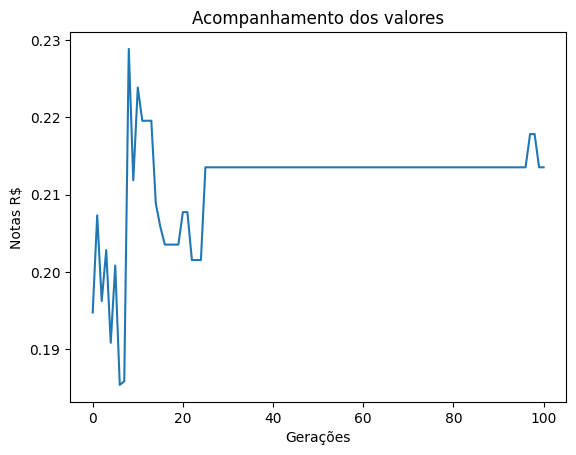

In [132]:
valores_grafico = info.select('max')

plt.title('Acompanhamento dos valores')
plt.plot(valores_grafico)
plt.xlabel('Gerações')
plt.ylabel('Notas R$')